In [1]:
#import data
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv('HistoricalData_1665035692939.csv')
df = df.set_index(pd.DatetimeIndex(df['Date']))
df.head(50)

,Date,Close/Last,Volume,Open,High,Low
Date,,,,,,
2022-10-04,10/04/2022,3790.93,--,3726.46,3791.92,3726.46
2022-10-03,10/03/2022,3678.43,--,3609.78,3698.35,3604.93
2022-09-30,09/30/2022,3585.62,--,3633.48,3671.44,3584.13
2022-09-29,09/29/2022,3640.47,--,3687.01,3687.01,3610.40
2022-09-28,09/28/2022,3719.04,--,3651.94,3736.74,3640.61
2022-09-27,09/27/2022,3647.29,--,3686.44,3717.53,3623.29
2022-09-26,09/26/2022,3655.04,--,3682.72,3715.67,3644.76
2022-09-23,09/23/2022,3693.23,--,3727.14,3727.14,3647.47
2022-09-22,09/22/2022,3757.99,--,3782.36,3790.90,3749.45


In [17]:
#create a new column for the difference between the high and low price
df['High-Low'] = df['High'] - df['Low']
#create a new column for the difference between the open and close price
df['Open-Close'] = df['Open'] - df['Close/Last']
df.head(50)

,Date,Close/Last,Volume,Open,High,Low,High-Low,Open-Close
Date,,,,,,,,
2022-10-04,10/04/2022,3790.93,--,3726.46,3791.92,3726.46,65.46,-64.47
2022-10-03,10/03/2022,3678.43,--,3609.78,3698.35,3604.93,93.42,-68.65
2022-09-30,09/30/2022,3585.62,--,3633.48,3671.44,3584.13,87.31,47.86
2022-09-29,09/29/2022,3640.47,--,3687.01,3687.01,3610.40,76.61,46.54
2022-09-28,09/28/2022,3719.04,--,3651.94,3736.74,3640.61,96.13,-67.10
2022-09-27,09/27/2022,3647.29,--,3686.44,3717.53,3623.29,94.24,39.15
2022-09-26,09/26/2022,3655.04,--,3682.72,3715.67,3644.76,70.91,27.68
2022-09-23,09/23/2022,3693.23,--,3727.14,3727.14,3647.47,79.67,33.91
2022-09-22,09/22/2022,3757.99,--,3782.36,3790.90,3749.45,41.45,24.37


In [18]:
#create lists to store the returns of each day in that month
January = []
February = []
March = []
April = []
May = []
June = []
July = []
August = []
September = []
October = []
November = []
December = []



In [19]:
#crete a function to calculate the returns of each day in that month
def get_returns(month,returns):
    if month =='01':
        January.append(float(returns))
    elif month =='02':
        February.append(float(returns))
    elif month =='03':
        March.append(float(returns))
    elif month =='04':
        April.append(float(returns))
    elif month =='05':
        May.append(float(returns))
    elif month =='06':
        June.append(float(returns))
    elif month =='07':
        July.append(float(returns))
    elif month =='08':
        August.append(float(returns))
    elif month =='09':
        September.append(float(returns))
    elif month =='10':
        October.append(float(returns))
    elif month =='11':
        November.append(float(returns))
    elif month =='12':
        December.append(float(returns))
    else:
        print('error')



In [21]:
#calculate and show the daily simple return (DSR= Daily Simple Return)

DSR  = df['Close/Last'].pct_change(1)
df['DSR'] = DSR

df


,Date,Close/Last,Volume,Open,High,Low,High-Low,Open-Close,DSR
Date,,,,,,,,,
2022-10-04,10/04/2022,3790.93,--,3726.46,3791.92,3726.46,65.46,-64.47,NaN
2022-10-03,10/03/2022,3678.43,--,3609.78,3698.35,3604.93,93.42,-68.65,-0.029676
2022-09-30,09/30/2022,3585.62,--,3633.48,3671.44,3584.13,87.31,47.86,-0.025231
2022-09-29,09/29/2022,3640.47,--,3687.01,3687.01,3610.40,76.61,46.54,0.015297
2022-09-28,09/28/2022,3719.04,--,3651.94,3736.74,3640.61,96.13,-67.10,0.021582
...,...,...,...,...,...,...,...,...,...
2012-10-11,10/11/2012,1432.84,--,1432.82,1443.90,1432.82,11.08,-0.02,0.002975
2012-10-10,10/10/2012,1432.56,--,1441.48,1442.52,1430.64,11.88,8.92,-0.000195
2012-10-09,10/09/2012,1441.48,--,1455.90,1455.90,1441.18,14.72,14.42,0.006227


In [22]:
#Remove first row of data
df = df.iloc[1:]

In [23]:
df

,Date,Close/Last,Volume,Open,High,Low,High-Low,Open-Close,DSR
Date,,,,,,,,,
2022-10-03,10/03/2022,3678.43,--,3609.78,3698.35,3604.93,93.42,-68.65,-0.029676
2022-09-30,09/30/2022,3585.62,--,3633.48,3671.44,3584.13,87.31,47.86,-0.025231
2022-09-29,09/29/2022,3640.47,--,3687.01,3687.01,3610.40,76.61,46.54,0.015297
2022-09-28,09/28/2022,3719.04,--,3651.94,3736.74,3640.61,96.13,-67.10,0.021582
2022-09-27,09/27/2022,3647.29,--,3686.44,3717.53,3623.29,94.24,39.15,-0.019293
...,...,...,...,...,...,...,...,...,...
2012-10-11,10/11/2012,1432.84,--,1432.82,1443.90,1432.82,11.08,-0.02,0.002975
2012-10-10,10/10/2012,1432.56,--,1441.48,1442.52,1430.64,11.88,8.92,-0.000195
2012-10-09,10/09/2012,1441.48,--,1455.90,1455.90,1441.18,14.72,14.42,0.006227


In [24]:
#create a loop to gather the daily simple returns of each month from the dataset and store them in the lists created above
for i in range(len(df)):
    date = df['Date'][i]
    month = date[0:2]
    returns = df['DSR'][i]
    get_returns(month,returns)

In [25]:
January

[-0.006816172298055201,
 -0.0185359480019045,
 -0.023768854992835986,
 0.005413138996558375,
 0.001498874694535246,
 0.01232195939354308,
 -0.002764090854464718,
 0.019279480847851582,
 0.011160609717739023,
 0.00978432566471632,
 0.01873234420846348,
 -0.0008192414510440615,
 0.01444935963065297,
 -0.0028097792165202584,
 -0.009076886190954037,
 0.001443165199591423,
 0.004066683343917132,
 0.0009646404957357468,
 0.01977628292678779,
 0.0006300145612638808,
 -0.015798148314987936,
 0.019691780821917915,
 -0.009666312860077464,
 0.026354588524489575,
 0.001491056260098489,
 -0.0036027763944224134,
 0.003019677363092832,
 -0.0003166306347925918,
 -0.01374404506925242,
 -0.00807073607955966,
 0.007242088502620536,
 0.003767579843711344,
 -0.00227043655376602,
 -0.000415659306690741,
 0.006598045588889212,
 -0.0054618948513339705,
 -0.014630145197290112,
 -0.005677482698084879,
 -0.007032729965708362,
 -0.007202393410733476,
 0.018025000620055076,
 -0.0031245622262962014,
 0.000867599437

In [36]:
#Creat a function to calculate the average of each month
def AVG(month):
    return sum(month)/len(month)

AVG(January)

-0.0001362496204789139

In [44]:
#Create a new dataframe to store the average of each month
df_AVG = pd.DataFrame()

#Get the avarage returns for each month and add the values under a new column "AVG"
df_AVG['AVG'] = AVG(January),AVG(February),AVG(March),AVG(April),AVG(May),AVG(June),AVG(July),AVG(August),AVG(September),AVG(October),AVG(November),AVG(December)


In [45]:
#Set he index to be the corresponding integer value of the month
df_AVG = df_AVG.set_index(df_AVG.index+1)
df_AVG

,AVG
1,-0.000136
2,-0.000396
3,0.000667
4,-0.000833
5,-0.000502
6,-0.000158
7,-0.001205
8,0.000142
9,0.000548
10,-0.000779


In [46]:
#show the avarage monthly returns
df_AVG * 100

,AVG
1,-0.013625
2,-0.039587
3,0.066733
4,-0.083266
5,-0.050158
6,-0.015816
7,-0.120527
8,0.014160
9,0.054828
10,-0.077892


<AxesSubplot: >

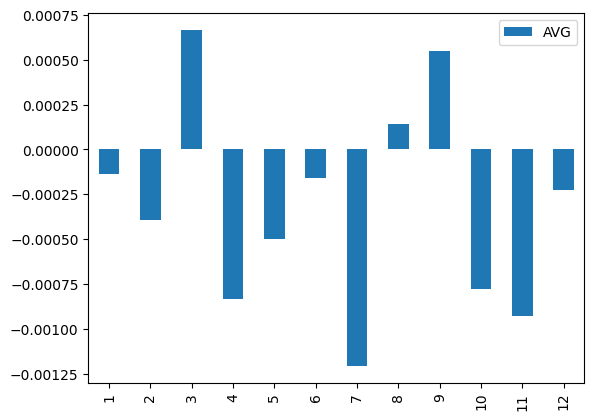

In [47]:
#Plot the average monthly returns
df_AVG.plot.bar()
